In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns

In [6]:
# leitura do nosso arquivo csv
df = pd.read_csv("ds_salaries.csv")

In [3]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
# quantidads de linhas e colunas
df.shape

(607, 12)

In [7]:
# backup
df_backup = df.copy()

In [6]:
#contar dados nulos em cada coluna
numos_por_colunas = df.isnull().sum()
print(numos_por_colunas)

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [8]:
# descrição dos dados
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [9]:
#converter a colunas salary para float e formartar casas decimais
df['salary'] = df['salary'].astype(float).round(2)

In [18]:
#verificr informações
info_df =df.info()
print(info_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          607 non-null    int64  
 1   work_year           607 non-null    int64  
 2   experience_level    607 non-null    object 
 3   employment_type     607 non-null    object 
 4   job_title           607 non-null    object 
 5   salary              607 non-null    float64
 6   salary_currency     607 non-null    object 
 7   salary_in_usd       607 non-null    int64  
 8   employee_residence  607 non-null    object 
 9   remote_ratio        607 non-null    int64  
 10  company_location    607 non-null    object 
 11  company_size        607 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 57.0+ KB
None


In [11]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [12]:
# descrição dos dados
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [21]:
def visualizar_duplicados(df):
    #idenfica as linhas duplicadas
    duplicados = df[df.duplicated(keep=False)]

    return duplicados
# vizualiza as ,inhas duplicadas
duplicados = visualizar_duplicados(df)
print(duplicados)

Empty DataFrame
Columns: [Unnamed: 0, work_year, experience_level, employment_type, job_title, salary, salary_currency, salary_in_usd, employee_residence, remote_ratio, company_location, company_size]
Index: []


# Analises

In [14]:
# Dicionário de mapeamento de códigos de países para nomes completos
country_mapping = {
    'DE': 'Germany', 'JP': 'Japan', 'GB': 'United Kingdom', 'HN': 'Honduras', 'US': 'United States',
    'HU': 'Hungary', 'NZ': 'New Zealand', 'FR': 'France', 'IN': 'India', 'PK': 'Pakistan',
    'CN': 'China', 'GR': 'Greece', 'AE': 'United Arab Emirates', 'NL': 'Netherlands',
    'MX': 'Mexico', 'CA': 'Canada', 'AT': 'Austria', 'NG': 'Nigeria', 'ES': 'Spain',
    'PT': 'Portugal', 'DK': 'Denmark', 'IT': 'Italy', 'HR': 'Croatia', 'LU': 'Luxembourg',
    'PL': 'Poland', 'SG': 'Singapore', 'RO': 'Romania', 'IQ': 'Iraq', 'BR': 'Brazil',
    'BE': 'Belgium', 'UA': 'Ukraine', 'IL': 'Israel', 'RU': 'Russia', 'MT': 'Malta',
    'CL': 'Chile', 'IR': 'Iran', 'CO': 'Colombia', 'MD': 'Moldova', 'KE': 'Kenya',
    'SI': 'Slovenia', 'CH': 'Switzerland', 'VN': 'Vietnam', 'AS': 'American Samoa',
    'TR': 'Turkey', 'CZ': 'Czech Republic', 'DZ': 'Algeria', 'EE': 'Estonia',
    'MY': 'Malaysia', 'AU': 'Australia', 'IE': 'Ireland'
}


# Renomeando os códigos dos países
df['company_location'] = df['company_location'].replace(country_mapping)

# Verificando o resultado
print(df['company_location'])

print(df['company_location'].unique())

0             Germany
1               Japan
2      United Kingdom
3            Honduras
4       United States
            ...      
602     United States
603     United States
604     United States
605     United States
606     United States
Name: company_location, Length: 607, dtype: object
['Germany' 'Japan' 'United Kingdom' 'Honduras' 'United States' 'Hungary'
 'New Zealand' 'France' 'India' 'Pakistan' 'China' 'Greece'
 'United Arab Emirates' 'Netherlands' 'Mexico' 'Canada' 'Austria'
 'Nigeria' 'Spain' 'Portugal' 'Denmark' 'Italy' 'Croatia' 'Luxembourg'
 'Poland' 'Singapore' 'Romania' 'Iraq' 'Brazil' 'Belgium' 'Ukraine'
 'Israel' 'Russia' 'Malta' 'Chile' 'Iran' 'Colombia' 'Moldova' 'Kenya'
 'Slovenia' 'Switzerland' 'Vietnam' 'American Samoa' 'Turkey'
 'Czech Republic' 'Algeria' 'Estonia' 'Malaysia' 'Australia' 'Ireland']


In [15]:
distinct_locations = df['company_location'].unique()
print(distinct_locations)

['Germany' 'Japan' 'United Kingdom' 'Honduras' 'United States' 'Hungary'
 'New Zealand' 'France' 'India' 'Pakistan' 'China' 'Greece'
 'United Arab Emirates' 'Netherlands' 'Mexico' 'Canada' 'Austria'
 'Nigeria' 'Spain' 'Portugal' 'Denmark' 'Italy' 'Croatia' 'Luxembourg'
 'Poland' 'Singapore' 'Romania' 'Iraq' 'Brazil' 'Belgium' 'Ukraine'
 'Israel' 'Russia' 'Malta' 'Chile' 'Iran' 'Colombia' 'Moldova' 'Kenya'
 'Slovenia' 'Switzerland' 'Vietnam' 'American Samoa' 'Turkey'
 'Czech Republic' 'Algeria' 'Estonia' 'Malaysia' 'Australia' 'Ireland']


In [37]:
# Qual o menor e maior salário de acordo com o cargo e tamanho da Empresa?
#    'S': 'Small','M': 'Medium','L': 'Large'
# 
    
    
max_salary_row = df.loc[df['salary'].idxmax()]
min_salary_row = df.loc[df['salary'].idxmin()]

max_salary_job_title = max_salary_row['job_title']
min_salary_job_title = min_salary_row['job_title']

max_salary_company_size = max_salary_row['company_size']
min_salary_company_size = min_salary_row['company_size']

max_salary_company_location = max_salary_row['company_location']
min_salary_company_location = min_salary_row['company_location']

print("Maior Salário:")
print("Cargo:", max_salary_job_title)
print("Tamanho da Empresa:", max_salary_company_size)
print("Localização da Empresa:", max_salary_company_location)

print("\nMenor Salário:")
print("Cargo:", min_salary_job_title)
print("Tamanho da Empresa:", min_salary_company_size)
print("Localização da Empresa:", min_salary_company_location)

Maior Salário:
Cargo: Data Scientist
Tamanho da Empresa: L
Localização da Empresa: Chile

Menor Salário:
Cargo: Data Engineer
Tamanho da Empresa: M
Localização da Empresa: Iran


experience_level
EN     88
EX     26
MI    213
SE    280
Name: job_title, dtype: int64


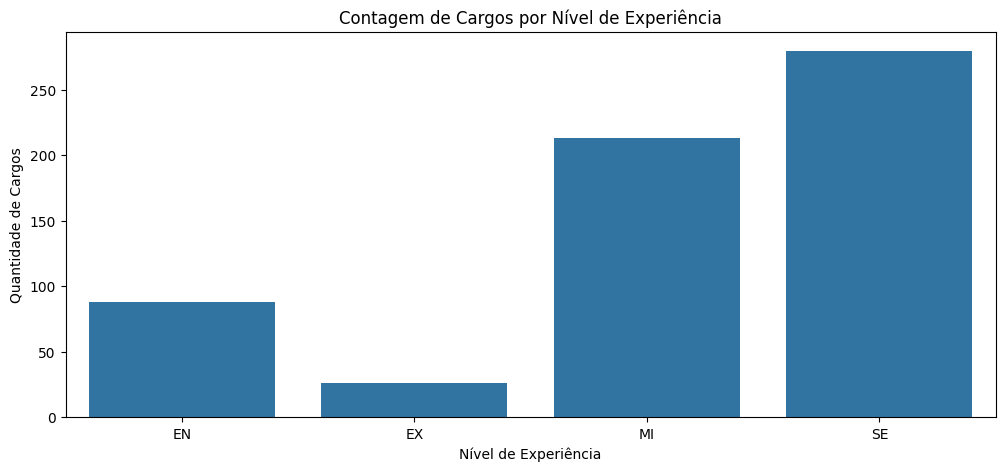

In [82]:
# Crie visualizações de gráficos com pandas, sendo no mínimo 4 gráficos.

# EN: Entry Level (Nível de Entrada) / MI: Mid Level (Nível Intermediário)/SE: Senior Level (Nível Sênior)/EX: Executive Level (Nível Executivo)


# Contagem de Cargos por Nível de Experiência
contagem_cargos = df.groupby('experience_level')['job_title'].count()
print(contagem_cargos)

plt.figure(figsize=(12, 5)) #  é usado para definir o tamanho da figura do gráfico que você está prestes a criar.
sns.barplot(x=contagem_cargos.index, y=contagem_cargos.values)
plt.title('Contagem de Cargos por Nível de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Quantidade de Cargos')
plt.show()

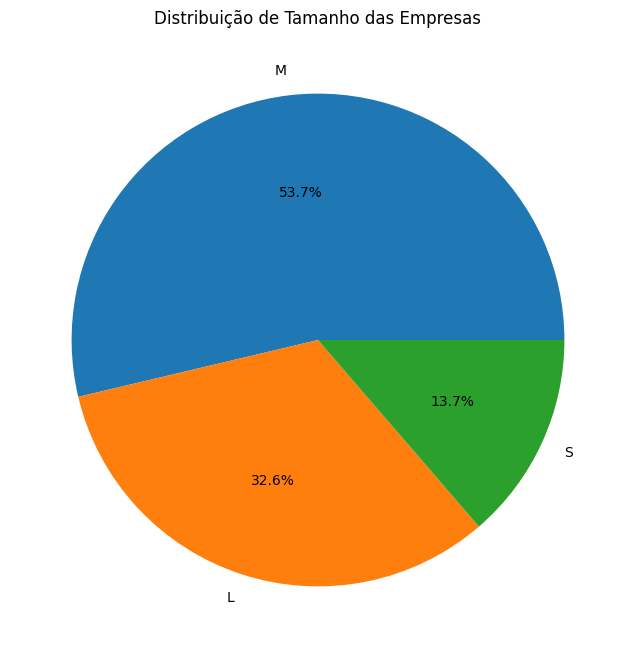

In [63]:
# Distribuição de Tamanho das Empresas
# '%1.1f%%  é usado para formatar os rótulos de porcentagem exibidos em cada setor do gráfico.
df['company_size'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title('Distribuição de Tamanho das Empresas')
plt.ylabel('')
plt.show()

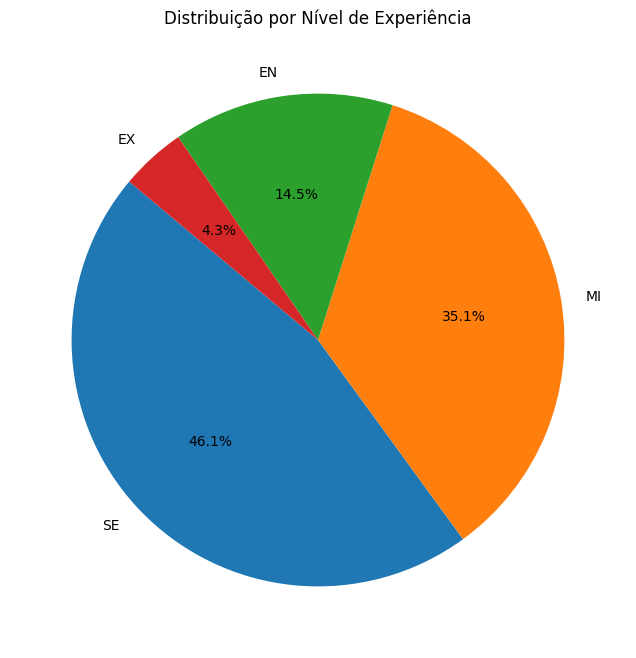

In [78]:
# Distribuição por nível de Experiência
# EN: Entry Level (Nível de Entrada) / MI: Mid Level (Nível Intermediário)/SE: Senior Level (Nível Sênior)/EX: Executive Level (Nível Executivo)
plt.figure(figsize=(8, 8))
sizes = df['experience_level'].value_counts()
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição por Nível de Experiência')
plt.show()

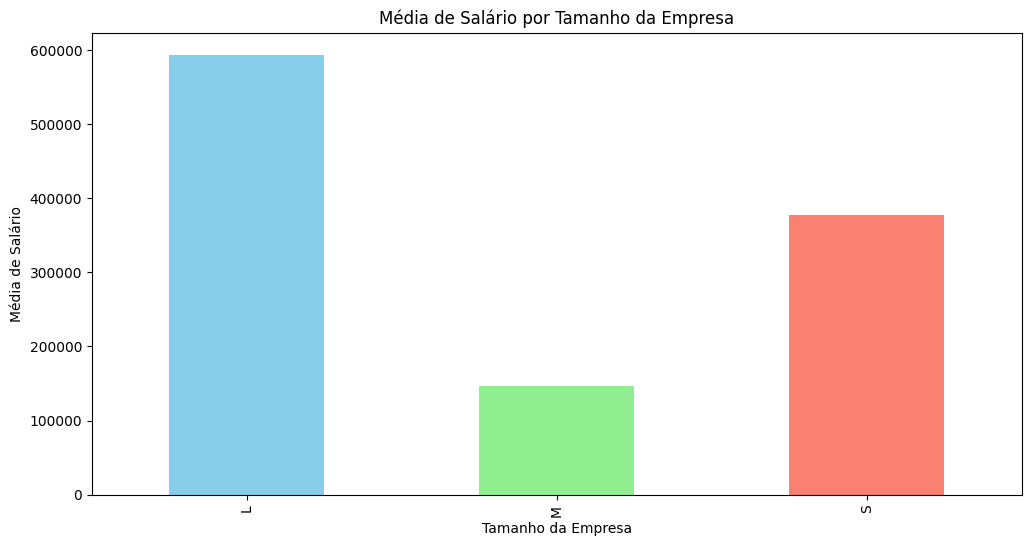

In [16]:



# Calcular a média de salário por tamanho da empresa
media_salario = df.groupby('company_size')['salary'].mean()

# Criar o gráfico de barras com cores personalizadas
plt.figure(figsize=(12, 6))
colors = ['skyblue', 'lightgreen', 'salmon']  # Definir cores personalizadas
media_salario.plot(kind='bar', color=colors)

# Adicionar títulos e rótulos
plt.title('Média de Salário por Tamanho da Empresa')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Média de Salário')

# Exibir o gráfico
plt.show()

In [91]:
# Faça  consultas em sql

import sqlite3 

In [112]:
baby_df = df

In [132]:
# conexao

conn = sqlite3.connect(':memory:')

# escrever o df em um SQL
baby_df.to_sql('baby_df', conn, index=False, if_exists='replace')

# executar a consulta

query_sql = """
SELECT  company_size, COUNT('job_title') AS Contagem
FROM baby_df
GROUP BY company_size;
"""
contagem_por_jobtitle = pd.read_sql_query(query_sql, conn)
print(contagem_por_jobtitle)

#fechar
conn.close

  company_size  Contagem
0            L       198
1            M       326
2            S        83


<function Connection.close()>

In [ ]:
# Utilize a biblioteca Matplotlib ou Seaborn para construir novos gráficos
# Teste Hipóteses

# Teste de maior salário conforme localidade da Empresa


# Hipótese Nula H0: Os maiores salário não relacionam com  o localidade da Empresa no United States.
# Hipótese Alternativa H1: maiores salários relacionam com a localidade no United States


In [23]:
# amostras


# Filtrar salários para empresas localizadas nos EUA
salario_usa = df[df['company_location'] == 'United States']['salary']

# Filtrar salários para empresas localizadas fora dos EUA
salario_nao_usa = df[df['company_location'] != 'United States']['salary']

# teste t
estatistica_t, valor_p = ttest_ind(salario_usa, salario_nao_usa)

print("Teste T de Idade")
print(f" Estatística T: {estatistica_t}")
print(f" Valor P: {valor_p}")



Teste T de Idade
 Estatística T: -2.592664200794162
 Valor P: 0.009753769047118726


In [24]:
#interpretação
if valor_p < 0.05:
    print("Rejeitamos a hipótese nula")
else:
    print("Nâo rejeitamos a hipótese nula")

Rejeitamos a hipótese nula


In [ ]:
Fim!!!